In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [126]:
df = pd.read_csv('datasetcovid.csv')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [128]:
df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [129]:
good_columns=['AGE','SEX', 'DATE_DIED', 'PNEUMONIA', 'COPD', 'ASTHMA','DIABETES', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO','CLASIFFICATION_FINAL']
df = df[good_columns]


In [130]:
df = df[(df.DATE_DIED != '9999-99-99')]
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]
df = df[(df.CLASIFFICATION_FINAL == 2) | (df.CLASIFFICATION_FINAL == 3)| (df.CLASIFFICATION_FINAL == 1)]
df.shape

(53515, 14)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53515 entries, 0 to 1047638
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AGE                   53515 non-null  int64 
 1   SEX                   53515 non-null  int64 
 2   DATE_DIED             53515 non-null  object
 3   PNEUMONIA             53515 non-null  int64 
 4   COPD                  53515 non-null  int64 
 5   ASTHMA                53515 non-null  int64 
 6   DIABETES              53515 non-null  int64 
 7   INMSUPR               53515 non-null  int64 
 8   HIPERTENSION          53515 non-null  int64 
 9   CARDIOVASCULAR        53515 non-null  int64 
 10  OBESITY               53515 non-null  int64 
 11  RENAL_CHRONIC         53515 non-null  int64 
 12  TOBACCO               53515 non-null  int64 
 13  CLASIFFICATION_FINAL  53515 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 6.1+ MB


In [132]:
df.head()

,AGE,SEX,DATE_DIED,PNEUMONIA,COPD,ASTHMA,DIABETES,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,65,1,03/05/2020,1,2,2,2,2,1,2,2,2,2,3
2,55,2,09/06/2020,2,2,2,1,2,2,2,2,2,2,3
4,68,2,21/06/2020,2,2,2,1,2,1,2,2,2,2,3
336,47,2,28/03/2020,1,1,2,2,2,1,2,1,2,2,3
337,43,2,29/03/2020,1,2,2,2,2,2,2,2,2,1,3


In [133]:
df.shape

(53515, 14)

In [134]:
df.DATE_DIED.value_counts()

DATE_DIED
13/07/2020    775
06/07/2020    769
07/07/2020    749
16/07/2020    749
15/07/2020    738
             ... 
20/02/2021      1
18/02/2021      1
11/02/2021      1
10/02/2021      1
17/04/2021      1
Name: count, Length: 287, dtype: int64

In [135]:
df.CLASIFFICATION_FINAL.value_counts()

CLASIFFICATION_FINAL
3    50810
2     1803
1      902
Name: count, dtype: int64

In [136]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], format='%d/%m/%Y')
df = df[~(df['DATE_DIED'].dt.year == 2021)]

In [137]:
df_age=df['AGE'].value_counts().sort_index()
print(df_age)

AGE
0      48
1      38
2       8
3       5
4       5
       ..
99      9
100    14
101     5
102     1
103     1
Name: count, Length: 104, dtype: int64


In [138]:
media = df['AGE'].mean()
print(f"media: {media}")

media: 61.54312284385781


In [139]:
df['SEX'] = df['SEX'].replace({1: 'female', 2: 'male'})
df.head()

,AGE,SEX,DATE_DIED,PNEUMONIA,COPD,ASTHMA,DIABETES,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,65,female,2020-05-03,1,2,2,2,2,1,2,2,2,2,3
2,55,male,2020-06-09,2,2,2,1,2,2,2,2,2,2,3
4,68,male,2020-06-21,2,2,2,1,2,1,2,2,2,2,3
336,47,male,2020-03-28,1,1,2,2,2,1,2,1,2,2,3
337,43,male,2020-03-29,1,2,2,2,2,2,2,2,2,1,3


In [140]:
df_sex = df['SEX'].value_counts()
print(df_sex)

SEX
male      34667
female    18669
Name: count, dtype: int64


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53336 entries, 0 to 1047638
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AGE                   53336 non-null  int64         
 1   SEX                   53336 non-null  object        
 2   DATE_DIED             53336 non-null  datetime64[ns]
 3   PNEUMONIA             53336 non-null  int64         
 4   COPD                  53336 non-null  int64         
 5   ASTHMA                53336 non-null  int64         
 6   DIABETES              53336 non-null  int64         
 7   INMSUPR               53336 non-null  int64         
 8   HIPERTENSION          53336 non-null  int64         
 9   CARDIOVASCULAR        53336 non-null  int64         
 10  OBESITY               53336 non-null  int64         
 11  RENAL_CHRONIC         53336 non-null  int64         
 12  TOBACCO               53336 non-null  int64         
 13  CLASIFFICATION_FINA

In [142]:
df.shape

(53336, 14)

In [143]:
columns_to_drop = ['AGE', 'SEX', 'DATE_DIED', 'CLASIFFICATION_FINAL']
existing_columns = [column for column in columns_to_drop if column in df_s.columns]

df_s = df.drop(existing_columns, axis=1)

for column in df_s:
    count = df_s[column].eq(1).sum()
    percentage = (count / 53515 ) * 100

    print(f"{column}: {count}--- {percentage.round(1)}%")

NameError: name 'df_s' is not defined

In [ ]:
df.nunique()

AGE                     104
SEX                       2
DATE_DIED               219
PNEUMONIA                 2
COPD                      2
ASTHMA                    2
DIABETES                  2
INMSUPR                   2
HIPERTENSION              2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      3
dtype: int64

In [ ]:
df['YEAR_DIED'] = df['DATE_DIED'].dt.year
year_counts = df['YEAR_DIED'].value_counts()
print(year_counts)

YEAR_DIED
2020    53336
Name: count, dtype: int64


In [ ]:
df['DAY_DIED'] = df['DATE_DIED'].dt.day
day_counts = df['DAY_DIED'].value_counts()
print(day_counts)

DAY_DIED
16    2011
17    1998
15    1970
14    1961
13    1897
12    1858
18    1850
19    1821
7     1813
6     1804
8     1784
11    1776
10    1773
9     1760
21    1720
4     1717
20    1706
1     1701
29    1683
5     1681
22    1674
26    1673
3     1655
25    1644
27    1637
30    1633
28    1627
23    1623
2     1614
24    1582
31     690
Name: count, dtype: int64


In [ ]:
df = df.drop('MONTHS_DIED', axis=1)

In [ ]:
df.head()

,AGE,SEX,DATE_DIED,PNEUMONIA,COPD,ASTHMA,DIABETES,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,MONTH_DIED,YEAR_DIED,DAY_DIED
0,65,female,2020-05-03,1,2,2,2,2,1,2,2,2,2,3,5,2020,3
2,55,male,2020-06-09,2,2,2,1,2,2,2,2,2,2,3,6,2020,9
4,68,male,2020-06-21,2,2,2,1,2,1,2,2,2,2,3,6,2020,21
336,47,male,2020-03-28,1,1,2,2,2,1,2,1,2,2,3,3,2020,28
337,43,male,2020-03-29,1,2,2,2,2,2,2,2,2,1,3,3,2020,29


In [ ]:
classification_counts= df['CLASIFFICATION_FINAL'].value_counts().to_frame().reset_index().sort_values(by='CLASIFFICATION_FINAL', ascending= True)
classification_counts_total= df['CLASIFFICATION_FINAL'].value_counts().to_frame().reset_index().sort_values(by='CLASIFFICATION_FINAL', ascending= True)
classification_counts.columns = ['COVID-19 classification', 'Number of deaths']
classification_counts_total.columns = ['COVID-19 classification', 'Number of deaths']
classification_dies = classification_counts['Number of deaths'].sum()
classification_dies = classification_counts_total['Number of deaths'].sum()
total_classification_dies = pd.DataFrame({'COVID-19 classification': ['Total'], 'Number of deaths': [classification_dies]})
classification_counts_total = pd.concat([classification_counts, total_classification_dies], ignore_index= True)
################################
frequencia_relativa_classification = classification_counts_total['Number of deaths']/classification_dies
frequencia_relativa_classification_percent = frequencia_relativa_classification * 100
classification_counts_total['Frequencia relativa'] = frequencia_relativa_classification
classification_counts_total['Frequencia relativa %'] = frequencia_relativa_classification_percent.round(1)

print(classification_counts_total)

  COVID-19 classification  Number of deaths  Frequencia relativa  \
0                       1               889             0.016668   
1                       2              1792             0.033598   
2                       3             50655             0.949734   
3                   Total             53336             1.000000   

   Frequencia relativa %  
0                    1.7  
1                    3.4  
2                   95.0  
3                  100.0  


In [ ]:
## We split the month, then calculate the number of died patients and calculate the total.
df['MONTH_DIED'] = df['DATE_DIED'].dt.month
month_counts = df['MONTH_DIED'].value_counts().to_frame().reset_index().sort_values(by='MONTH_DIED', ascending= True)
month_counts_total = df['MONTH_DIED'].value_counts().to_frame().reset_index().sort_values(by='MONTH_DIED', ascending= True)
month_counts.columns = ['Month', 'Number of deaths']
month_counts_total.columns = ['Month', 'Number of deaths']
allmonth_dies = month_counts_total['Number of deaths'].sum()
total_month_dies = pd.DataFrame({'Month': ['Total'], 'Number of deaths': [allmonth_dies]})
month_counts_total = pd.concat([month_counts, total_month_dies], ignore_index= True)
#####################
frequencia_relativa_month = month_counts_total['Number of deaths']/allmonth_dies
frequencia_relativa_month_percent = frequencia_relativa_month * 100
month_counts_total['Frequencia relativa'] = frequencia_relativa_month
month_counts_total['Frequencia relativa %'] = frequencia_relativa_month_percent.round(1)


print(month_counts_total)

    Month  Number of deaths  Frequencia relativa  Frequencia relativa %
0       2                 1             0.000019                    0.0
1       3                84             0.001575                    0.2
2       4              3824             0.071696                    7.2
3       5             13496             0.253037                   25.3
4       6             18744             0.351432                   35.1
5       7             16195             0.303641                   30.4
6       8               900             0.016874                    1.7
7       9                61             0.001144                    0.1
8      10                13             0.000244                    0.0
9      11                 6             0.000112                    0.0
10     12                12             0.000225                    0.0
11  Total             53336             1.000000                  100.0


In [ ]:


faixas_etarias = [-1, 5, 11, 17, 23,29, 35,41 ,47, 53, 59, 65, 71, 77, 83, 89, 95, 101, 107]

df['IDADE_GRUPO'] = pd.cut(df['AGE'], bins=faixas_etarias) 
contagem_por_grupo = df['IDADE_GRUPO'].value_counts().to_frame().reset_index().sort_values(by = 'IDADE_GRUPO', ascending = True)
contagem_por_grupo_total = df['IDADE_GRUPO'].value_counts().to_frame().reset_index().sort_values(by = 'IDADE_GRUPO', ascending = True)

contagem_por_grupo.columns = ['Age', 'Number of dead']
contagem_por_grupo_total.columns = ['Age', 'Number of dead']

all_dies = contagem_por_grupo_total['Number of dead'].sum()
total_dies = pd.DataFrame({'Age': ['Total'], 'Number of dead': [all_dies]})
contagem_por_grupo_total = pd.concat([contagem_por_grupo, total_dies], ignore_index=True)
#####
frequencia_relativa_age = contagem_por_grupo_total['Number of dead']/all_dies
frequencia_relativa_age_percent = frequencia_relativa_age * 100
contagem_por_grupo_total['Frequencia_relativa']= frequencia_relativa_age
contagem_por_grupo_total['Frequencia_relativa %'] =frequencia_relativa_age_percent.round(1)
print(contagem_por_grupo_total)

           Age  Number of dead  Frequencia_relativa  Frequencia_relativa %
0      (-1, 5]             109             0.002044                    0.2
1      (5, 11]              33             0.000619                    0.1
2     (11, 17]              51             0.000956                    0.1
3     (17, 23]             174             0.003262                    0.3
4     (23, 29]             521             0.009768                    1.0
5     (29, 35]            1201             0.022518                    2.3
6     (35, 41]            2225             0.041717                    4.2
7     (41, 47]            4139             0.077602                    7.8
8     (47, 53]            6214             0.116507                   11.7
9     (53, 59]            8076             0.151417                   15.1
10    (59, 65]            8918             0.167204                   16.7
11    (65, 71]            8381             0.157136                   15.7
12    (71, 77]           

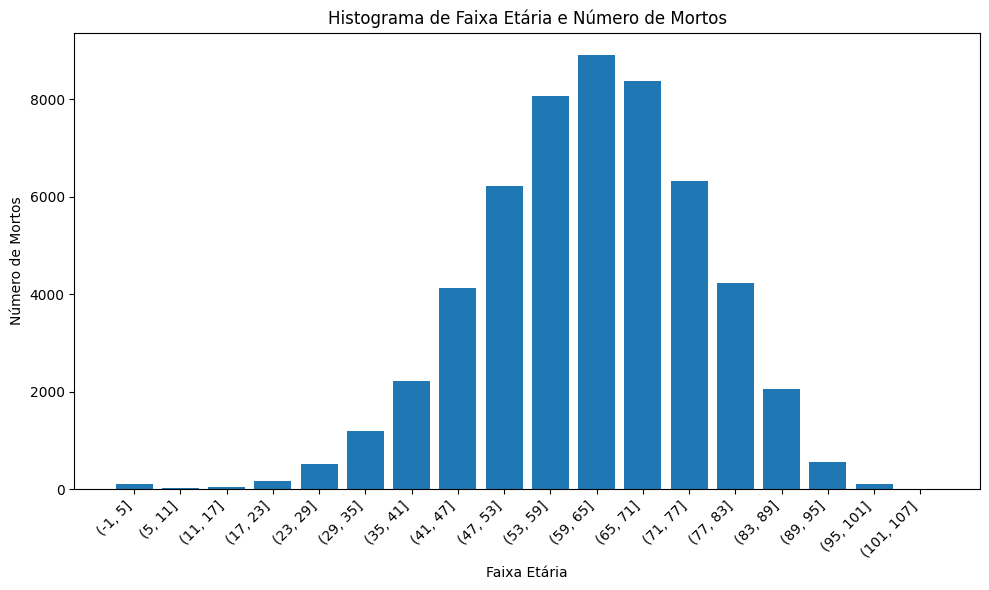

In [144]:
contagem_por_grupo['Age'] = contagem_por_grupo['Age'].astype(str)

# Criar o histograma de barras verticais
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
plt.bar(contagem_por_grupo['Age'], contagem_por_grupo['Number of dead'])

# Adicionar rótulos e título ao gráfico
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Mortos')
plt.title('Histograma de Faixa Etária e Número de Mortos')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha="right")

# Mostrar o gráfico
plt.tight_layout()
plt.show()

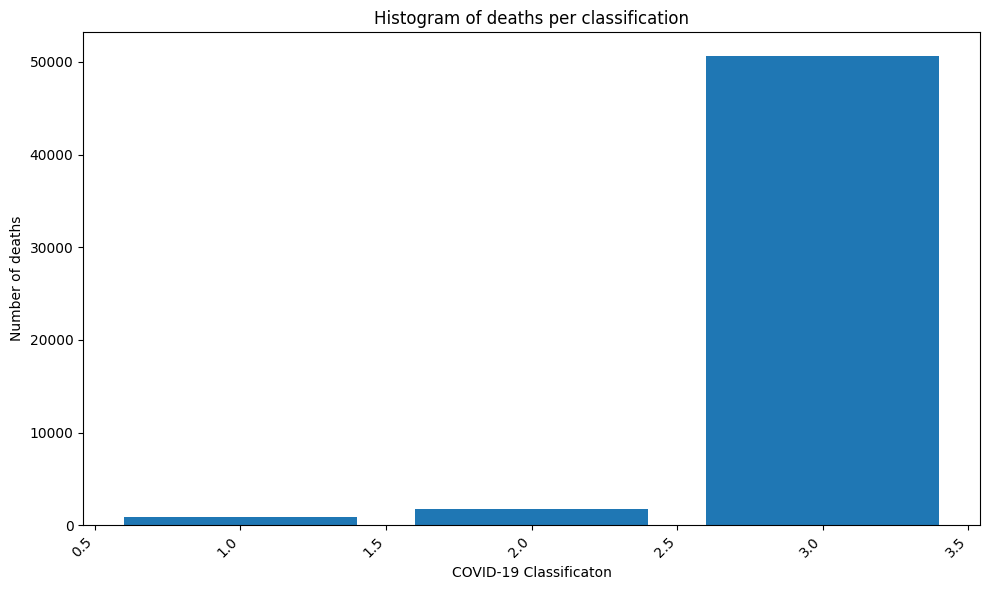

In [147]:

plt.figure(figsize=(10, 6))  
plt.bar(classification_counts['COVID-19 classification'], classification_counts['Number of deaths'])


plt.xlabel('COVID-19 Classificaton')
plt.ylabel('Number of deaths')
plt.title('Histogram of deaths per classification')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

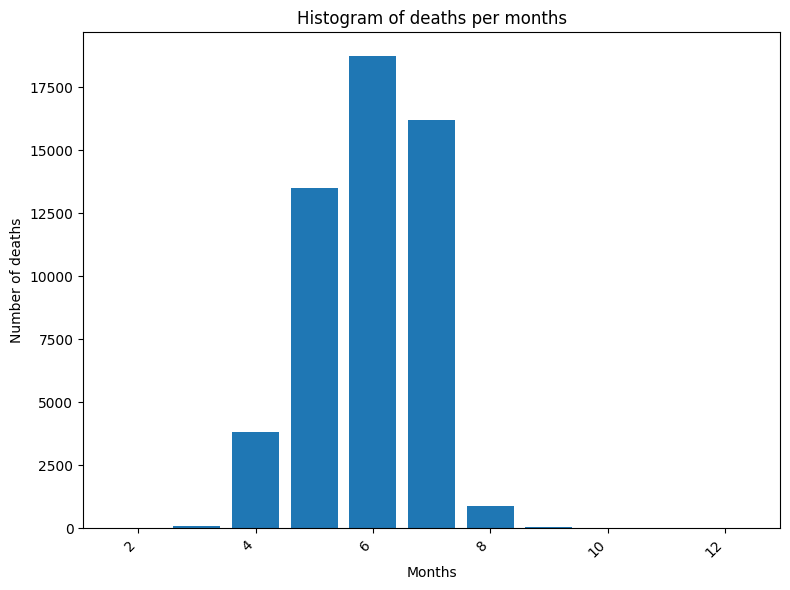

In [152]:
plt.figure(figsize=(8, 6))  
plt.bar(month_counts['Month'], month_counts['Number of deaths'])


plt.xlabel('Months')
plt.ylabel('Number of deaths')
plt.title('Histogram of deaths per months')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()